In [1]:
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import json

%matplotlib inline

In [1]:
pwd

'/home/jonathan/Dropbox/pyqt_pyecog_v2'

In [24]:
metadata = OrderedDict(fs= 512,
                       no_channels= 4,
                       data_format='>i4',
                       volts_per_bit=2.5/6/2**31, 
                       transmitter_id='001',
                       start_timestamp_unix=1564066727,
                       channel_labels=['channel_'+str(i) for i in range(4)],
                       experiment_metadata_str='kainate_acid_hippo')

def save_metadata_as_json(obj,fp):
    if not fp.endswith('.meta'):
        if fp.endswith('.bin'):
            fp = fp[:-4] 
        fp = fp + '.meta'
        
    print(fp)
    with open(fp, 'w') as json_file:
        json.dump(obj,json_file, indent=2, sort_keys=True)

        
#json.dump(metadata, fp='test_meta.meta')
#json.dumps(metadata, fp='test_meta_s.meta')
save_metadata_as_json(metadata, 'test.meta')

test.meta


In [70]:
fs = metadata['fs']
t = np.linspace(0,3600,3600*fs)
data = []
for i in range(metadata['no_channels']):
    data.append((np.sin(2*np.pi*10*t) + np.random.randn(*t.shape)) / metadata['volts_per_bit'])
y = np.vstack(data)
y = y.astype(metadata['data_format'])
y.shape

(4, 1843200)

In [71]:
y.dtype

dtype('>i4')

In [72]:
y.tofile('test.bin')

In [73]:
y2 = np.fromfile('test.bin',dtype=metadata['data_format'])
#y2.reshape((-1,4)).shape

In [74]:
signal = y2[0::4]

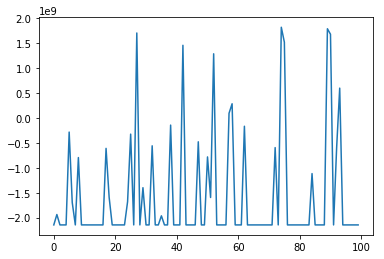

In [75]:
plt.plot(signal[:100])

In [8]:
save_metadata_as_json(metadata,  'test.metae.r.ge.bin')

test.metae.r.ge.meta


In [9]:

x = np.linspace(0,3600,y.shape[0])

NameError: name 'fs' is not defined